<style>
h1 {
    counter-reset: none;
}
</style>

**Integrantes**:

- Aranda Huerta, Milene
- Escriba Flores, Daniel

---

# Introducción

En el marco de un proyecto de ciencia de datos académico, utilizaremos el conjunto de datos "Statlog (German Credit Data)", proporcionado por el UCI Machine Learning Repository y recopilado por Hofmann, H. en 1994. Este dataset, que consta de una serie de atributos que describen a individuos y los clasifican como buenos o malos riesgos crediticios, será la base de nuestro análisis. Para fines académicos, lo llamaremos "Banco Alemán". Este proyecto se enfoca en las fases iniciales del proceso de minería de datos, siguiendo la metodología CRISP-DM, con el objetivo de establecer una base sólida para el análisis predictivo, desde la comprensión del contexto empresarial hasta la evaluación preliminar de modelos.


---

# ENTENDIMIENTO DEL NEGOCIO

## Misión y visión del Banco Alemán

### Mision

Brindar servicios financieros confiables y sostenibles, evaluando objetivamente a los solicitantes de crédito mediante técnicas de ciencia de datos, con el fin de facilitar decisiones de préstamo más seguras, justas e inclusivas.

### Vision

Convertirse en una entidad líder en análisis de riesgo crediticio basado en datos abiertos y modelos predictivos, promoviendo la eficiencia operativa, la inclusión financiera y la transparencia en cada decisión de crédito.

### Aplicación de la metodología CRISP-DM:

El   ha adoptado la metodología CRISP-DM para desarrollar un sistema automatizado de clasificación de riesgo crediticio. Se utiliza el conjunto de datos Statlog (German Credit Data) del repositorio UCI, que contiene 1000 registros y 20 atributos que combinan factores demográficos, históricos y financieros. El proyecto busca implementar modelos que optimicen la clasificación de clientes en categorías de riesgo (1 = bueno, 2 = malo), considerando una matriz de costos donde los errores tienen impactos diferenciados.

## Objetivos

### Objetivo

Diseñar un modelo de clasificación basado en aprendizaje automático para predecir el riesgo crediticio de los clientes del Banco Alemán, utilizando el dataset German Credit Data y aplicando la metodología CRISP-DM, con el objetivo de alcanzar un F1-score mínimo del 80% en la predicción de riesgos crediticios.

### Objetivos Específicos

1. Aplicar sistemáticamente cada fase de CRISP-DM (desde el entendimiento del negocio hasta la evaluación del modelo), documentando cada paso.
2. Realizar un análisis exploratorio sobre los 20 atributos del dataset, incluyendo estado civil, empleo, duración del crédito, entre otros, identificando patrones relevantes en los datos.
3. Estandarizar y codificar variables categóricas, sin imputación, ya que el dataset no presenta valores faltantes.
4. Entrenar un modelo de Regresión Logística y evaluar su desempeño con y sin outliers, para determinar la mejor configuración para la predicción de riesgos crediticios.
5. Evaluar con métricas de precisión, recall, F1-score, curva ROC-AUC y validación cruzada, considerando la matriz de costos que penaliza fuertemente la clasificación errónea de clientes malos como buenos, y alcanzar un F1-score mínimo del 80% en la predicción de riesgos crediticios.

## Definicion del problema

El Banco Alemán enfrenta desafíos al otorgar créditos a nuevos clientes sin una evaluación cuantitativa sólida. Este proceso, cuando se basa únicamente en criterios subjetivos o tradicionales, puede derivar en morosidad elevada y pérdidas financieras.
El conjunto de datos Statlog (German Credit Data) refleja exactamente esta situación: clasifica a los clientes como de buen o mal riesgo en función de información real histórica. La matriz de costos que acompaña al dataset demuestra que los errores en la clasificación pueden tener impactos financieros desiguales, especialmente si se aprueba un crédito a un cliente que en realidad es riesgoso.
Este proyecto propone desarrollar modelos predictivos que reduzcan estos errores, mejoren la eficiencia del proceso de aprobación de créditos y fortalezcan la sostenibilidad financiera del Banco Alemán mediante decisiones automatizadas y basadas en datos.


## Preguntas de investigacion Analitica

- ¿Cómo afectan las variables al riesgo crediticio?
- ¿Existe una correlación significativa entre variables como el estado de la cuenta corriente y el riesgo?
- ¿Qué outliers están presentes y cómo afectan el modelo?
- ¿Qué impacto tienen los outliers en variables como duración del crédito y cantidad del crédito?
- ¿Qué métricas son más relevantes para evaluar el modelo?
- ¿Cómo se balancean la precisión, recall y F1-score en el contexto de la matriz de costos?
- ¿Cómo se puede mejorar la precisión del modelo al ajustar variables y parámetros?
- ¿Qué variables y parámetros son más críticos para la precisión del modelo?

## Indicadores Clave de Rendimiento (KPIs) y Variables Críticas

### KPIs

- F1-score: Balance entre precisión y recall.
- ROC-AUC: Capacidad de distinguir riesgos.
- Precisión: Predicciones correctas.
- Recall: Clientes de alto riesgo identificados.
- Validación Cruzada: Robustez del modelo.

### Variables Críticas

- Estado de la Cuenta Corriente: Liquidez del cliente.
- Duración del Crédito: Tiempo para pagar.
- Cantidad del Crédito: Monto solicitado.
- Historial de Crédito: Pasado crediticio.
- Empleo Actual: Estabilidad laboral.
- Cuenta de Ahorros/Valores: Estabilidad financiera.
- Tasa de Instalmento: Porcentaje del ingreso para el pago.
- Edad: Influencia en la capacidad de pago.
- Propósito del Crédito: Uso previsto del crédito.
- Otros Deudores/Garantes: Responsables financieros adicionales.

---

# Entendimiento de los Datos

In [28]:
# Librerias Necesarias

from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Analisis exploratorio de los datos (EDA)

In [29]:
# Cargar dataset

# fetch dataset
statlog_german_credit_data = fetch_ucirepo(id=144)

# data (as pandas dataframes)
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

# Unir X e y para procesamiento
df = pd.concat([X, y], axis=1)

# Mostrar primeros 4 registros
print("Datos originales:")
df.head(4)


Datos originales:


,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1


Se identificó que las columnas originales del dataset presentaban nombres genéricos (Attribute1 , Attribute2 , etc.), dificultando la interpretación directa de su significado. Para garantizar un análisis coherente y evitar ambigüedades, se procedió a renombrar las variables utilizando descriptores basados en la documentación oficial del dataset (ej. status_cuenta_cheques , historial_credito ). Este cambio facilita la comprensión del contexto de cada atributo, mejora la calidad del análisis exploratorio y asegura una comunicación clara de los resultados a equipos técnicos y no técnicos.

In [30]:
# Mapeo de las columnas

column_mapping = {
    "Attribute1": "status_cuenta_cheques",
    "Attribute2": "duracion_meses",
    "Attribute3": "historial_credito",
    "Attribute4": "propósito",
    "Attribute5": "monto_credito",
    "Attribute6": "cuenta_ahorro",
    "Attribute7": "empleo_desde",
    "Attribute8": "tasa_pagos",
    "Attribute9": "estado_civil_sexo",
    "Attribute10": "otros_deudores",
    "Attribute11": "residencia_desde",
    "Attribute12": "propiedad",
    "Attribute13": "edad",
    "Attribute14": "planes_pagos",
    "Attribute15": "vivienda",
    "Attribute16": "num_creditos_banco",
    "Attribute17": "trabajo",
    "Attribute18": "num_mantenidos",
    "Attribute19": "telefono",
    "Attribute20": "trabajador_extranjero",
    "class": "clase_crediticia"
}

df.rename(columns=column_mapping, inplace=True)

print("Datos con columnas renombradas:")
df.head(4)

Datos con columnas renombradas:


,status_cuenta_cheques,duracion_meses,historial_credito,propósito,monto_credito,cuenta_ahorro,empleo_desde,tasa_pagos,estado_civil_sexo,otros_deudores,...,propiedad,edad,planes_pagos,vivienda,num_creditos_banco,trabajo,num_mantenidos,telefono,trabajador_extranjero,clase_crediticia
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1


In [31]:
#mostrar el tipo de datos de las columnas

print(df.dtypes)

status_cuenta_cheques    object
duracion_meses            int64
historial_credito        object
propósito                object
monto_credito             int64
cuenta_ahorro            object
empleo_desde             object
tasa_pagos                int64
estado_civil_sexo        object
otros_deudores           object
residencia_desde          int64
propiedad                object
edad                      int64
planes_pagos             object
vivienda                 object
num_creditos_banco        int64
trabajo                  object
num_mantenidos            int64
telefono                 object
trabajador_extranjero    object
clase_crediticia          int64
dtype: object


In [32]:
# Verificar valores faltantes en el dataset

print("Cantidad de filas con valores faltantes:")
print(df.isnull().sum())

Cantidad de filas con valores faltantes:
status_cuenta_cheques    0
duracion_meses           0
historial_credito        0
propósito                0
monto_credito            0
cuenta_ahorro            0
empleo_desde             0
tasa_pagos               0
estado_civil_sexo        0
otros_deudores           0
residencia_desde         0
propiedad                0
edad                     0
planes_pagos             0
vivienda                 0
num_creditos_banco       0
trabajo                  0
num_mantenidos           0
telefono                 0
trabajador_extranjero    0
clase_crediticia         0
dtype: int64


In [33]:
# Descripcion estadistica del dataset

df.describe()

,duracion_meses,monto_credito,tasa_pagos,residencia_desde,edad,num_creditos_banco,num_mantenidos,clase_crediticia
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [34]:
# separar en categoricas y numericas omitiendo la clase

categoricas = df.select_dtypes(include=["object"]).columns
numericas = df.select_dtypes(include=["int64", "float64"]).columns
#numericas = numericas.drop("clase_crediticia")

print("Variables categoricas:")
print(categoricas)
print("\n")

print("Variables numericas:")
print(numericas)
print("\n")

Variables categoricas:
Index(['status_cuenta_cheques', 'historial_credito', 'propósito',
       'cuenta_ahorro', 'empleo_desde', 'estado_civil_sexo', 'otros_deudores',
       'propiedad', 'planes_pagos', 'vivienda', 'trabajo', 'telefono',
       'trabajador_extranjero'],
      dtype='object')


Variables numericas:
Index(['duracion_meses', 'monto_credito', 'tasa_pagos', 'residencia_desde',
       'edad', 'num_creditos_banco', 'num_mantenidos', 'clase_crediticia'],
      dtype='object')




In [35]:
# Calcular matriz de correlaciones de las variables numericas

correlaciones = df[numericas].corr()
print("Matriz de correlaciones:")
print(correlaciones)
print("\n")

Matriz de correlaciones:
                    duracion_meses  monto_credito  tasa_pagos  \
duracion_meses            1.000000       0.624984    0.074749   
monto_credito             0.624984       1.000000   -0.271316   
tasa_pagos                0.074749      -0.271316    1.000000   
residencia_desde          0.034067       0.028926    0.049302   
edad                     -0.036136       0.032716    0.058266   
num_creditos_banco       -0.011284       0.020795    0.021669   
num_mantenidos           -0.023834       0.017142   -0.071207   
clase_crediticia          0.214927       0.154739    0.072404   

                    residencia_desde      edad  num_creditos_banco  \
duracion_meses              0.034067 -0.036136           -0.011284   
monto_credito               0.028926  0.032716            0.020795   
tasa_pagos                  0.049302  0.058266            0.021669   
residencia_desde            1.000000  0.266419            0.089625   
edad                        0.266419  1

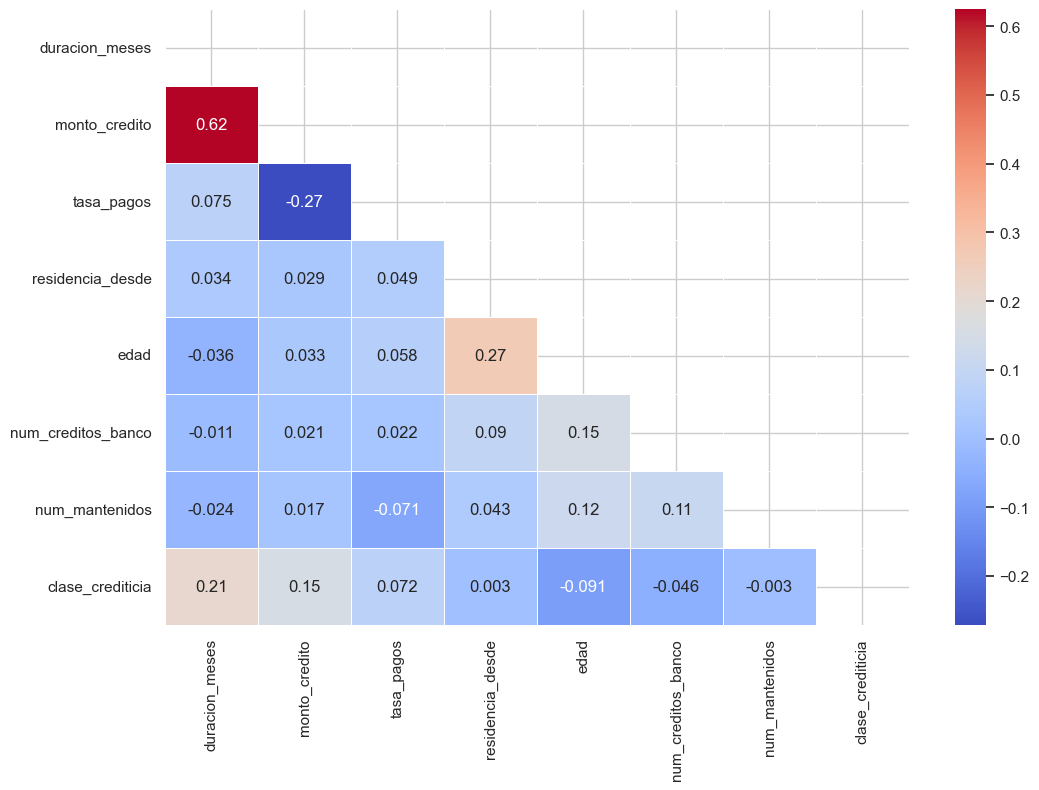

In [36]:
# Visualisar con heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(correlaciones, annot=True, cmap="coolwarm",
            linewidths=0.5, mask=np.triu(correlaciones))
plt.show()

## Interpretación del Mapa de Calor y Estrategia para Regresión Logística

### Variables más relevantes para `clase_crediticia` (variable dependiente):
- `duracion_meses`: Correlación positiva moderada (**+0.21**).  
  > A mayor duración del crédito, mayor probabilidad de pertenecer a la clase `2` (mal crédito).   
- `monto_credito`: Correlación positiva débil (**+0.15**).  
  > Montos más altos se asocian ligeramente con mayor riesgo crediticio.   
- `edad`: Correlación negativa débil (**-0.091**).  
  > Menor edad se relaciona débilmente con mayor riesgo.   

### Problemas potenciales:
- **Multicolinealidad alta** entre `duracion_meses` y `monto_credito` (**+0.62**).  
  - Solución: Eliminar una variable o usar regularización (Lasso/Ridge) en el modelo.

### Variables irrelevantes (baja correlación):
- `num_mantenidos`, `tasa_pagos`, `residencia_desde`, `num_creditos_banco` (correlaciones ~0).  
  - Acción: Excluir para simplificar el modelo y evitar ruido.

### **Justificación para Regresión Logística:**
1. **Variables significativas**: `duracion_meses` y `monto_credito` son predictores razonables para el riesgo crediticio.
2. **Hipótesis validada**: La relación entre las variables independientes y `clase_crediticia` es suficiente para explorar un modelo predictivo, aunque las correlaciones no sean muy altas.
3. **Simplificación**: Eliminando variables irrelevantes y manejando multicolinealidad, el modelo puede alcanzar un rendimiento aceptable.

💡 **Próximos pasos**:  
- Seleccionar variables (`duracion_meses`, `monto_credito`, `edad`).  
- Entrenar un modelo de regresión logística con validación cruzada.  
- Evaluar métricas como **AUC-ROC**, **precisión** y **matriz de confusión**.


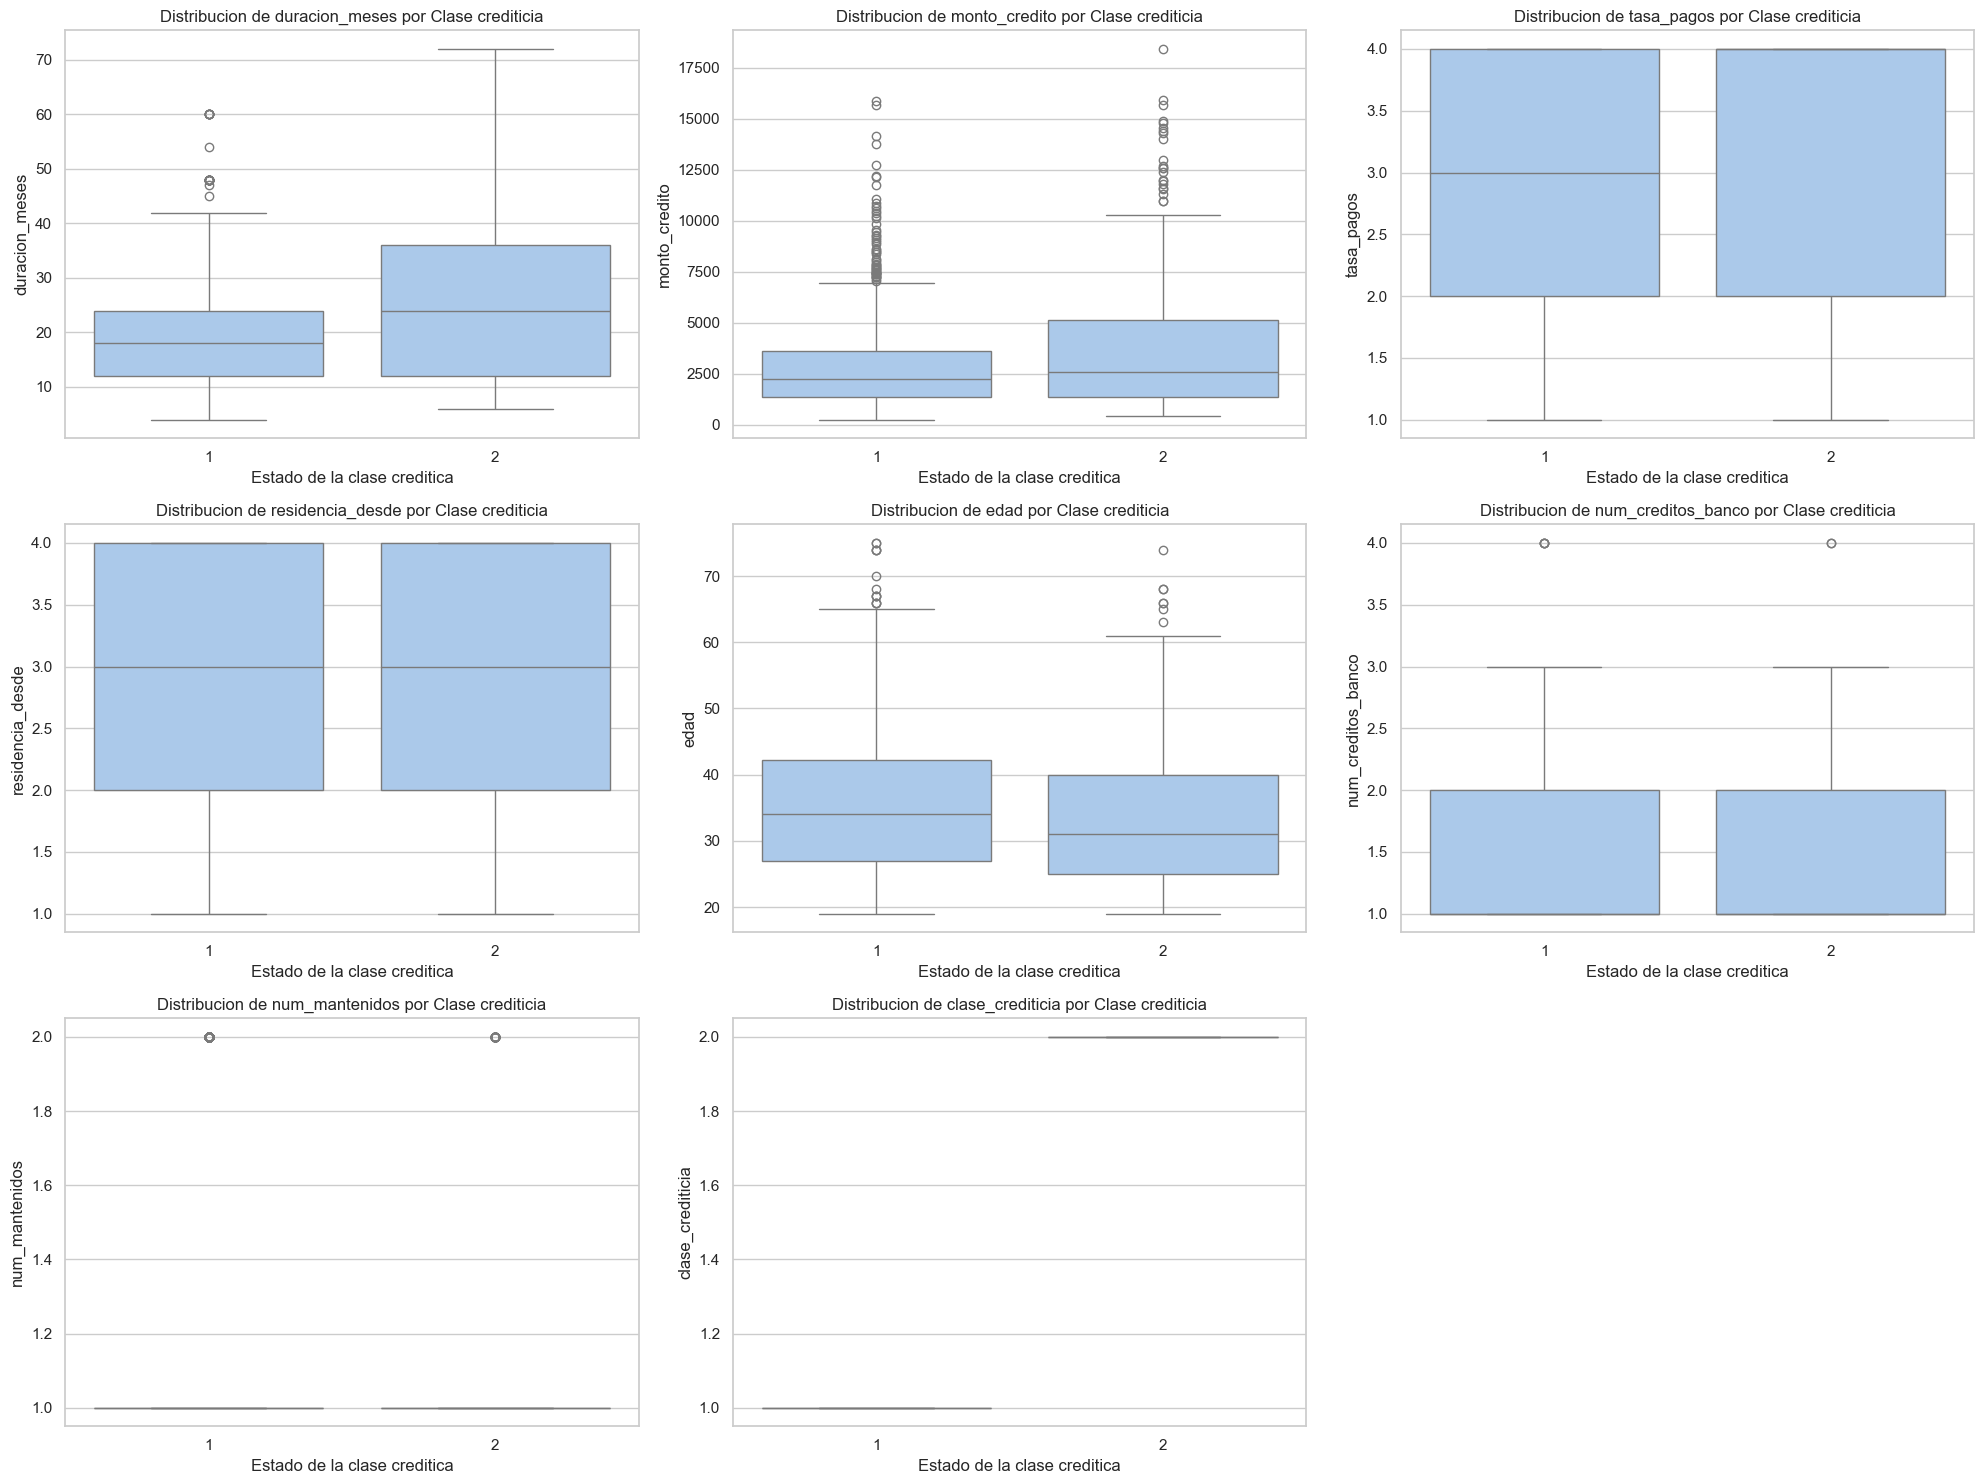

In [37]:
# Visualización de cada variable numerica en diagrma de caja

#Quitar  clase_creditica de numericas para  evitar la redundacia

# numericas = numericas.drop('clase_crediticia')


# Configuración general del gráfico: tamaño y estilo visual
sns.set(style="whitegrid", palette="pastel")

num_cols = 3  # Número de columnas en la cuadrícula de gráficos
num_rows = int(np.ceil(len(numericas) / num_cols))  # Número de filas necesarias, redondeado hacia arriba

# Ajustar el tamaño de la figura en función del número de gráficos (variables numéricas)
plt.figure(figsize=(20, 5 * num_rows))

for i, columna in enumerate(numericas,1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x='clase_crediticia', y=columna, data=df,showfliers=True)
    plt.title(f'Distribucion de {columna} por Clase crediticia')
    plt.xlabel('Estado de la clase creditica')
    plt.ylabel(columna)

# Ajustar automáticamente los gráficos para que no se superpongan
plt.tight_layout()
plt.show()

## 📊 Interpretación de los Boxplots y Manejo de Outliers

### **Variables con Outliers Significativos**
- **`monto_credito`**:  
  - **Outliers en ambas clases** (valores muy altos).  
  - **Interpretación**: Créditos de montos extremadamente grandes podrían indicar riesgo elevado o casos atípicos (ejemplo: préstamos empresariales vs. personales).  

- **`duracion_meses`**:  
  - **Outliers en clase 2** (duraciones muy largas).  
  - **Interpretación**: Préstamos a plazos prolongados podrían asociarse con mayor incumplimiento.  

- **`edad`**:  
  - **Pocos outliers** (edades muy altas).  
  - **Interpretación**: Clientes mayores podrían tener patrones de pago diferentes.  

---

### **Variables Sin Outliers Relevantes**
- **`tasa_pagos`**, **`residencia_desde`**, **`num_creditos_banco`**, **`num_mantenidos`**:  
  - Todos los valores están dentro del rango intercuartílico.  
  - **Acción**: No requieren manejo de outliers.

---

### **¿Eliminar Outliers?**  
**No se recomienda eliminarlos**, a menos que sean errores de datos. Aquí el porqué:

- **Riesgo de sesgo**: Los outliers podrían capturar información crítica para predecir `clase_crediticia` (ejemplo: créditos muy grandes suelen tener mayor riesgo).  
- **Modelo logístico es robusto**: Aunque los outliers pueden afectar coeficientes, la regresión logística es menos sensible que modelos lineales a valores extremos.  
- **Validación necesaria**: Si los outliers son pocos (<5% del dataset), prueba el modelo con y sin ellos. Si el rendimiento mejora significativamente al eliminarlos, podría justificarse.  

---


In [38]:
# Función para detectar outliers usando IQR
def detectar_outliers(df, columnas):
    df_filtrado = df.copy()
    outliers_por_columna = {}
    
    for col in columnas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        
        # Contar outliers
        outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)].shape[0]
        outliers_por_columna[col] = outliers
        
        # Filtrar datos
        df_filtrado = df_filtrado[(df_filtrado[col] >= limite_inferior) & (df_filtrado[col] <= limite_superior)]
    
    return df_filtrado, outliers_por_columna


# Detectar y eliminar outliers
df_filtrado, outliers = detectar_outliers(df, numericas)

# Porcentaje de filas eliminadas
porcentaje_eliminado = (df.shape[0] - df_filtrado.shape[0]) / df.shape[0] * 100
print(f"Porcentaje de filas eliminadas por outliers: {porcentaje_eliminado:.2f}%")
print("Outliers por columna:", outliers)

Porcentaje de filas eliminadas por outliers: 27.20%
Outliers por columna: {'duracion_meses': 70, 'monto_credito': 72, 'tasa_pagos': 0, 'residencia_desde': 0, 'edad': 23, 'num_creditos_banco': 6, 'num_mantenidos': 155, 'clase_crediticia': 0}


In [39]:
#Verificamos la proporción de clases

print(df["clase_crediticia"].value_counts(normalize=True))  # Proporción de clases

clase_crediticia
1    0.7
2    0.3
Name: proportion, dtype: float64



Distribución de clases:
clase_crediticia
1    700
2    300
Name: count, dtype: int64


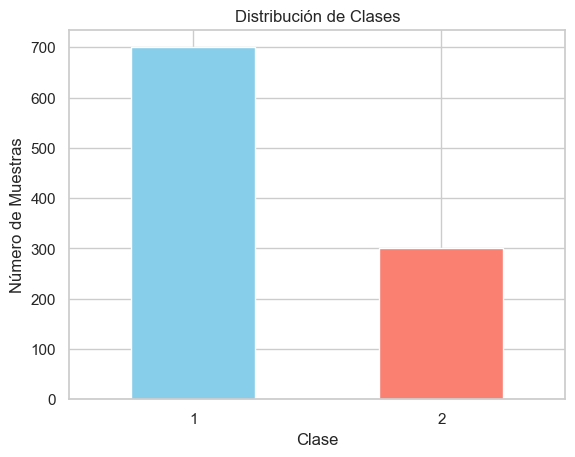


Índice de desbalance: 2.33
El desbalance es moderado. Puedes probar técnicas ligeras como ponderación de clases.


In [50]:
# Visualizar distribución de clases
class_counts = df['clase_crediticia'].value_counts()  # Contar el número de muestras en cada clase
print("\nDistribución de clases:")
print(class_counts)

class_counts.plot(kind='bar', color=['skyblue', 'salmon'])  # Crear un gráfico de barras para visualizar la distribución
plt.title('Distribución de Clases')  # Título del gráfico
plt.xlabel('Clase')  # Etiqueta del eje X
plt.ylabel('Número de Muestras')  # Etiqueta del eje Y
plt.xticks(rotation=0)  # Rotar las etiquetas del eje X
plt.show()  # Mostrar el gráfico

# Calcular el índice de desbalance
imbalance_ratio = class_counts.max() / class_counts.min()
print(f"\nÍndice de desbalance: {imbalance_ratio:.2f}")
if imbalance_ratio > 5:
    print("ADVERTENCIA: El desbalance es significativo (> 5). Considera aplicar técnicas de balanceo.")
else:
    print("El desbalance es moderado. Puedes probar técnicas ligeras como ponderación de clases.")

Este desequilibrio puede hacer que el modelo se incline hacia la clase mayoritaria, ignorando patrones importantes en la minoritaria. Aquí te explico cómo manejarlo:

🔍 Impacto potencial del desequilibrio
Sesgo del modelo :
El modelo podría priorizar predecir bien la clase 1 (70%) y fallar en identificar la clase 2 (30%), lo cual es crítico en crédito: clasificar mal un "mal cliente" tiene mayor costo.
Métricas engañosas :
La precisión (accuracy) puede ser alta incluso si el modelo ignora la clase minoritaria. Por ejemplo:
Si predices siempre "clase 1", tendrás 70% de acierto , pero no identificarás ningún mal crédito.
🛠️ Técnicas para manejar el desequilibrio
1. Ajuste de pesos en el modelo (Class Weights)
En regresión logística, asigna más importancia a la clase minoritaria.
En scikit-learn, usa el parámetro class_weight="balanced"

---

In [40]:
# Valores faltantes no presento
# no es necesario imputar

# colcocar vbarra outlieres


In [51]:

# ======================================================
# PASO 3: Preprocesamiento inicial
# ======================================================

# Eliminar outliers usando Z-score
from scipy.stats import zscore

def eliminar_outliers_zscore(df, threshold=3):#funcion para eliminar los outlier con un umbral con 3 desviaciones estándar con respecto a la media
    """
    Elimina outliers basándose en el Z-score.
    """
    numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    z_scores = np.abs(zscore(df[numeric_features]))
    df_cleaned = df[(z_scores < threshold).all(axis=1)]
    return df_cleaned

# Aplicar eliminación de outliers
print(f"\nFilas antes de eliminar outliers: {len(df)}")
df_l = eliminar_outliers_zscore(df)
print(f"Filas después de eliminar outliers: {len(df_l)}")
#1916 filas se eliminaron




Filas antes de eliminar outliers: 1000
Filas después de eliminar outliers: 952


# Modelacion :Regresion Logistica

In [55]:
#LIBRERIAS NECESARIAS   

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, auc, accuracy_score, f1_score, precision_score,recall_score, ConfusionMatrixDisplay, RocCurveDisplay  # Para evaluar el rendimiento del modelo

In [60]:
 #Aplicar eliminación de outliers
print(f"\nFilas antes de eliminar outliers: {len(df)}")
df_l = eliminar_outliers_zscore(df[numericas])
print(f"Filas después de eliminar outliers: {len(df_l)}")
#1916 filas se eliminaron

# Separar la matriz de características (variable independiente) y target (vector obejtivo dependiente que queremos predecir)
X = df_l.drop(columns=['clase_crediticia'])  # Todas las columnas excepto 'defaultpay'
y = df_l['clase_crediticia']  # Solo la columna 'defaultpay' es una columna
###########################################################################
####                 ENTRENAMIENTO                          ################
###########################################################################
# Dividir los datos en entrenamiento y prueba (estratificado por la variable objetivo)
import random
random.seed(42) #semilla de generador de números aleatorios

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)
#X_train,y_train, entrenamiento
#x_test y_test: prueba
# stratify=y asegura que la proporción de clases en y sea la misma en los conjuntos de entrenamiento y prueba
#test_size=0.3: datos prueba son los datos de reserva es el 30% de los datos para conjunto prueba y el 70% para el entrenamiento

print("\nShape de X_train:", X_train.shape)
print("Shape de X_test:", X_test.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de y_test:", y_test.shape)

# Escalar las variables numéricas
scaler = StandardScaler()
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
#seleccionar las columnas numericas (enteras o flotantes)
#olumns.tolist() convierte los nombres de las columnas en lista
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
#escalamiento estándar a las varibales independientes(Características) numéricas y las transforma para que tenga media 0 y desviacion estándar 1
X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])



Filas antes de eliminar outliers: 1000
Filas después de eliminar outliers: 952

Shape de X_train: (666, 7)
Shape de X_test: (286, 7)
Shape de y_train: (666,)
Shape de y_test: (286,)



Métricas del modelo sin balanceo:
Accuracy: 0.6084
Precision: 0.7725
Recall: 0.6355
F1-Score: 0.6973
ROC AUC: 0.6524

Reporte de Clasificación (Sin Balanceo):
              precision    recall  f1-score   support

           1       0.77      0.64      0.70       203
           2       0.38      0.54      0.45        83

    accuracy                           0.61       286
   macro avg       0.58      0.59      0.57       286
weighted avg       0.66      0.61      0.62       286



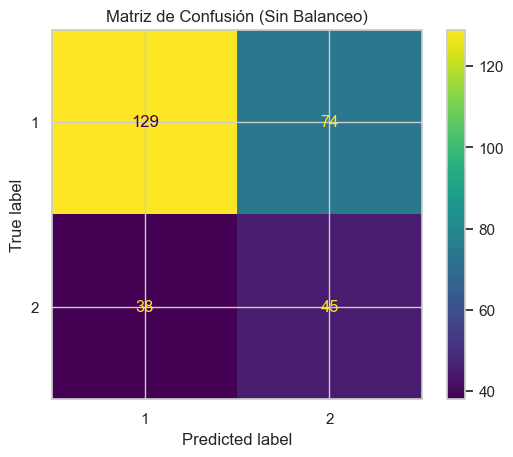

In [61]:

# ======================================================
# PASO 4: Entrenar el modelo sin balanceo
# ======================================================

# Entrenar un modelo de regresión logística sin balanceo
glm = LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='balanced', random_state=42)
glm.fit(X_train_scaled, y_train)
#solver='lbfgs',especifica el algoritmo de optimizacion utilizando el modelo lbfgs
# max_iter=1000, máximo de iteraciones es 1000
# class_weight='balanced' asignamos los pesos a las clases de manera inversamente proporcional
# Hacer predicciones
#fit: entrena el modelo utilizando los datos entrenamiento escalados y sus etiquetas correspondientes al y_train
y_pred = glm.predict(X_test_scaled) #realizar laas predicciones en el conjunto prueba X_test_scaled, las predicciones son las clases predichas (0,1)
y_prob = glm.predict_proba(X_test_scaled)[:, 1]#devuelve las probabilidades de pertencia a cada clase.
# y=x0+ ax1+bx2....bx3
# Evaluar métricas
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),#la proporción de predicciones correctas respecto al total de predicciones
    'Precision': precision_score(y_test, y_pred),#prop de predicciones  positivas respecto a las predicciones positivas
    'Recall': recall_score(y_test, y_pred),#sensibilidad: prop de muestras positivas correctamente identificadas respecto a todas las muestras positivas reales
    'F1-Score': f1_score(y_test, y_pred),#media armonica entre la precision y recall
    'ROC AUC': roc_auc_score(y_test, y_prob)#curvas que miden la capacidad del modelo de distinguir entre clases
}

print("\nMétricas del modelo sin balanceo:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

# Reporte de clasificación
print("\nReporte de Clasificación (Sin Balanceo):")
print(classification_report(y_test, y_pred))

# Matriz de Confusión
ConfusionMatrixDisplay.from_estimator(glm, X_test_scaled, y_test)
plt.title("Matriz de Confusión (Sin Balanceo)")
plt.show()
